In [3]:
import os
os.getcwd()

'C:\\Users\\Ashu\\Desktop\\Smart Bridge Project\\Training Notebook'

In [4]:
os.chdir("C:/Users/Ashu/Desktop/Remote Internship 2020/Data Sets")

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
%matplotlib inline

In [6]:
data=pd.read_csv("indian_liver_patient.csv")

In [7]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Removing Missing Data

In [8]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

## Observation

We could find only 4 null values in the feature 'Albumin_and_Globulin_Ratio'

In [9]:
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

In [10]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

## Observation
The Null values where removed by filling in the values of null with mean value of the feature 'Albumin_and_Globulin_Ratio'.

# Changing Categorical variables to Continous variables 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 47.9+ KB


# Observation
Only Gender feature could be seen as a object remaining all being int or float features we would be changing this categorical variable into continous variable


In [12]:
data['Gender']=data['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [13]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


## Observation
The Gender is changed  such that Females are indicated as 0's  and Male's are indicated as 1.

# Data Visualization

1    416
2    167
Name: Dataset, dtype: int64

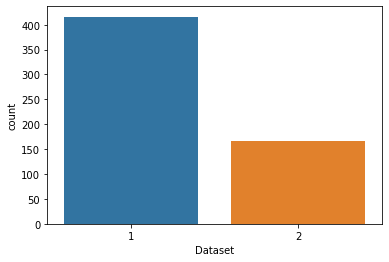

In [14]:
sns.countplot(data=data, x = 'Dataset', label='Count')
data['Dataset'].value_counts()

## Observation

The total number of patitents who were diagosed with Liver Diesease are : 416 and  
The total number of patitents who weren't diagosed with Liver Diesease are : 167

In [15]:
data.pivot_table(data,index=['Dataset'])

,Age,Alamine_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio,Alkaline_Phosphotase,Aspartate_Aminotransferase,Direct_Bilirubin,Gender,Total_Bilirubin,Total_Protiens
Dataset,,,,,,,,,,
1,46.153846,99.605769,3.060577,0.914337,319.007212,137.699519,1.923558,0.778846,4.164423,6.459135
2,41.239521,33.652695,3.344311,1.028588,219.754491,40.688623,0.396407,0.700599,1.142515,6.543114


In [16]:
data.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404,-0.082416
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319


## Observation

Some of the features are closely related to each other like  
1. Total_Bilirubin and Direct_Bilirubin  
2.  Alamine_Aminotransferase and Aspartate_Aminotransferase  
3. Total_Protiens and Albumin  
  
Hence any one  feature in each set of features could be removed for dimensionality reduction.


In [17]:
data=data.drop(['Direct_Bilirubin', 'Aspartate_Aminotransferase'], axis = 1)

In [18]:
data

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,187,16,6.8,3.3,0.90,1
1,62,1,10.9,699,64,7.5,3.2,0.74,1
2,62,1,7.3,490,60,7.0,3.3,0.89,1
3,58,1,1.0,182,14,6.8,3.4,1.00,1
4,72,1,3.9,195,27,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,500,20,5.9,1.6,0.37,2
579,40,1,0.6,98,35,6.0,3.2,1.10,1
580,52,1,0.8,245,48,6.4,3.2,1.00,1
581,31,1,1.3,184,29,6.8,3.4,1.00,1


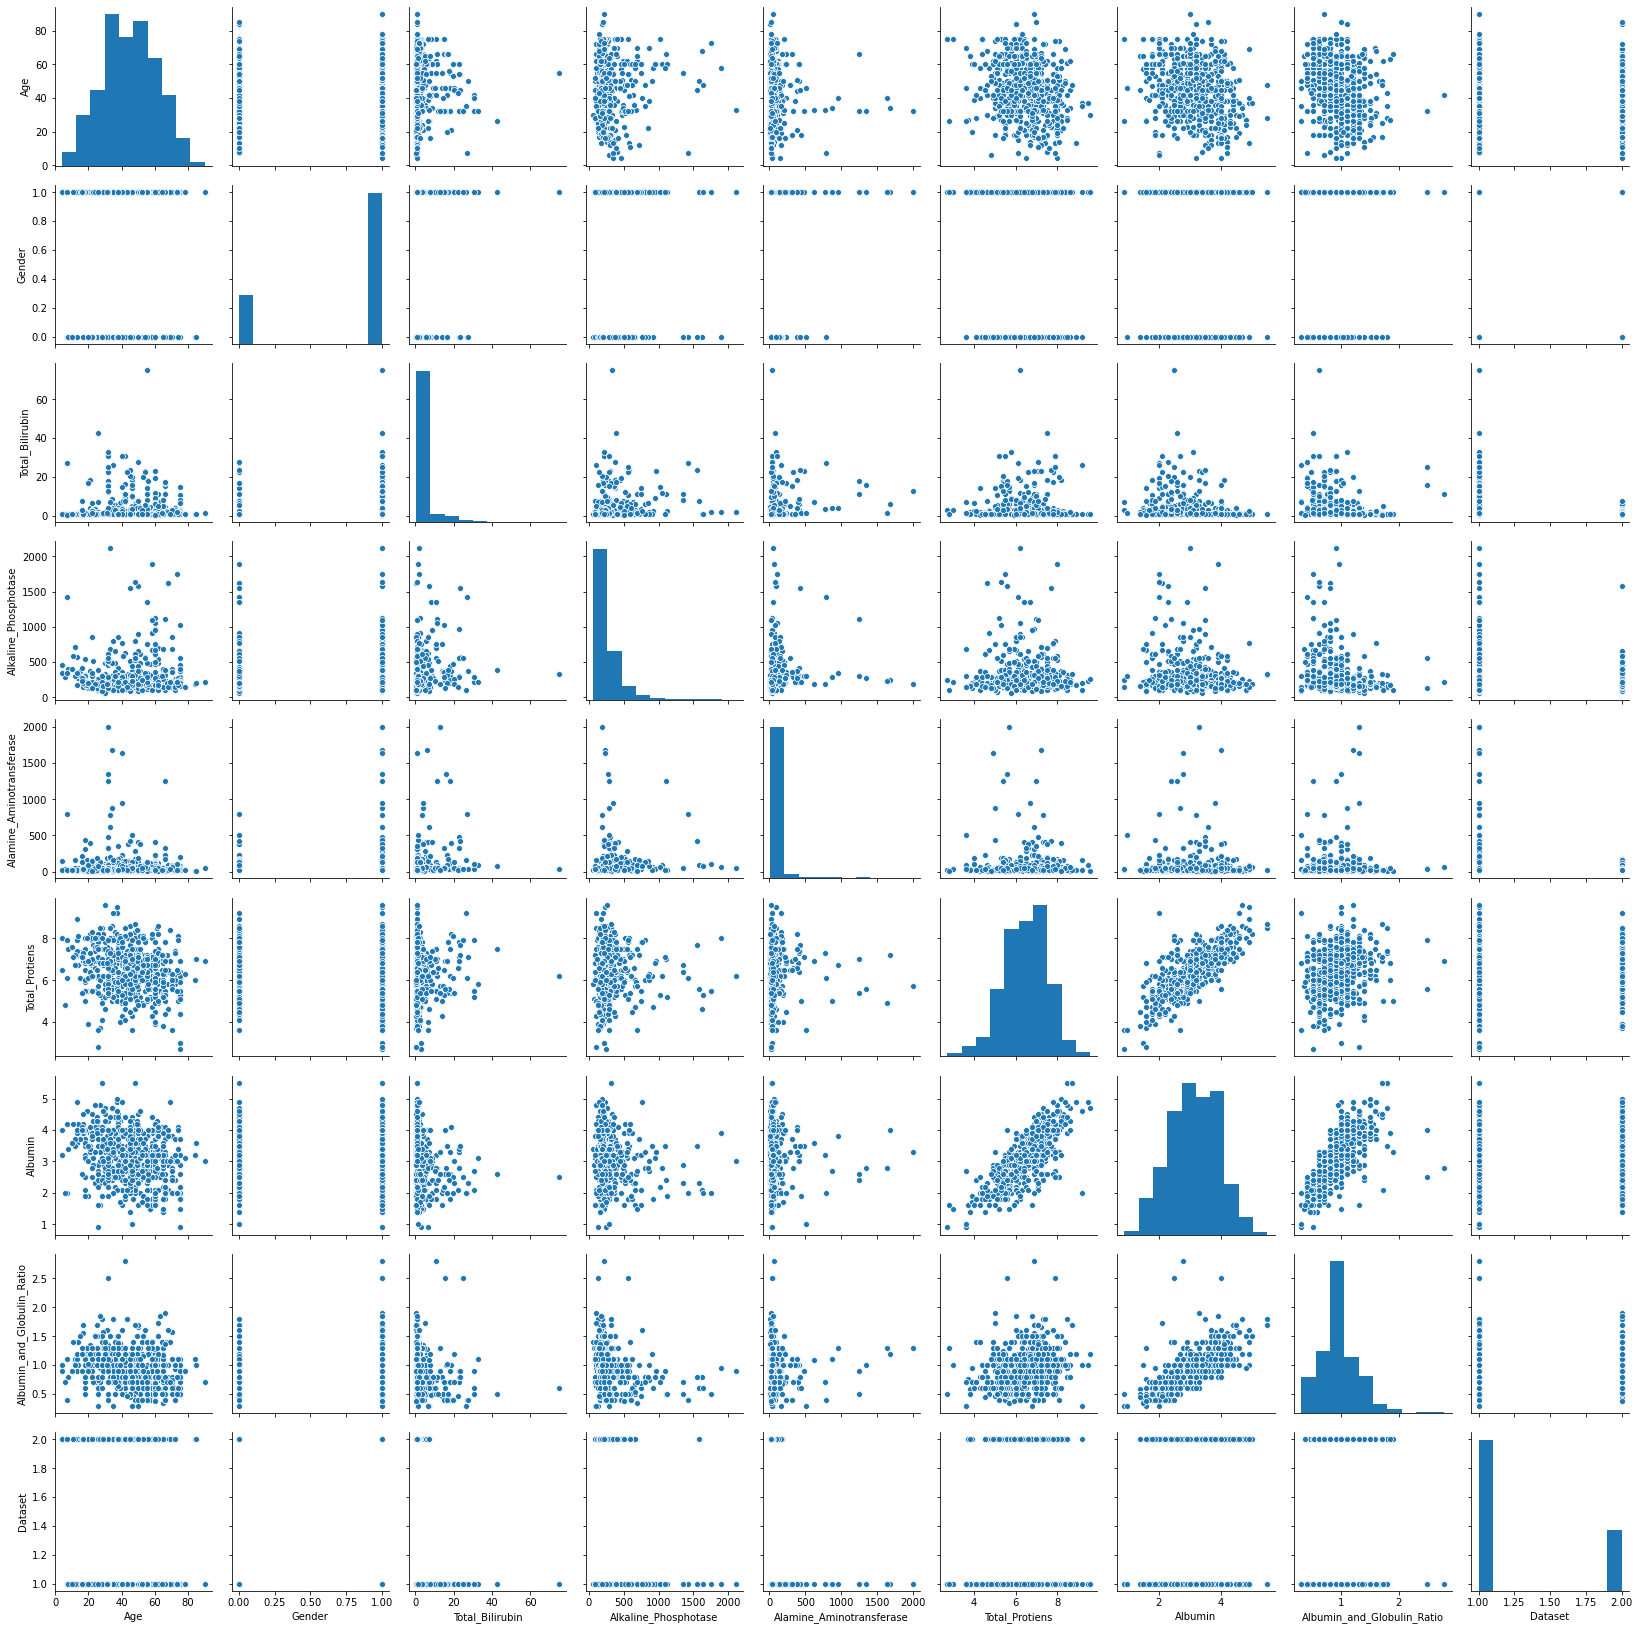

In [19]:
sns.pairplot(data)

## Observation

Total_Bilirubin, Alamine_Aminotransferase could be the possible factors causing The Liver Diesease

# Feature Scaling 

In [20]:
data_features=data.drop(['Gender','Dataset'], axis = 1)
# data_num_features=data.drop(['Gender','Dataset'],axis=1)

In [21]:
data_features

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,187,16,6.8,3.3,0.90
1,62,10.9,699,64,7.5,3.2,0.74
2,62,7.3,490,60,7.0,3.3,0.89
3,58,1.0,182,14,6.8,3.4,1.00
4,72,3.9,195,27,7.3,2.4,0.40
...,...,...,...,...,...,...,...
578,60,0.5,500,20,5.9,1.6,0.37
579,40,0.6,98,35,6.0,3.2,1.10
580,52,0.8,245,48,6.4,3.2,1.00
581,31,1.3,184,29,6.8,3.4,1.00


In [22]:
data_features.describe()

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,290.576329,80.713551,6.483190,3.141852,0.947064
std,16.189833,6.209522,242.937989,182.620356,1.085451,0.795519,0.318492
min,4.000000,0.400000,63.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,175.500000,23.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,208.000000,35.000000,6.600000,3.100000,0.947064
75%,58.000000,2.600000,298.000000,60.500000,7.200000,3.800000,1.100000
max,90.000000,75.000000,2110.000000,2000.000000,9.600000,5.500000,2.800000


## Observation
As the values of features have different ranges we will perform scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols=list(data_features.columns)
data_features_scaled=pd.DataFrame(data=data_features)
data_features_scaled[cols]=scaler.fit_transform(data_features[cols])
data_features_scaled.head()

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,-0.418878,-0.426715,-0.354665,0.292120,0.198969,-0.147898
1,1.066637,1.225171,1.682629,-0.091599,0.937566,0.073157,-0.650697
2,1.066637,0.644919,0.821588,-0.113522,0.476533,0.198969,-0.179323
3,0.819356,-0.370523,-0.447314,-0.365626,0.292120,0.324781,0.166351
4,1.684839,0.096902,-0.393756,-0.294379,0.753153,-0.933340,-1.719144


# Feature Engineering 

In [31]:
x=data_features_scaled.iloc[:,:]
x

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,-0.418878,-0.426715,-0.354665,0.292120,0.198969,-0.147898
1,1.066637,1.225171,1.682629,-0.091599,0.937566,0.073157,-0.650697
2,1.066637,0.644919,0.821588,-0.113522,0.476533,0.198969,-0.179323
3,0.819356,-0.370523,-0.447314,-0.365626,0.292120,0.324781,0.166351
4,1.684839,0.096902,-0.393756,-0.294379,0.753153,-0.933340,-1.719144
...,...,...,...,...,...,...,...
578,0.942997,-0.451114,0.862786,-0.332743,-0.537740,-1.939837,-1.813419
579,-0.293407,-0.434996,-0.793378,-0.250535,-0.445534,0.073157,0.480601
580,0.448435,-0.402760,-0.187766,-0.179288,-0.076707,0.073157,0.166351
581,-0.849789,-0.322169,-0.439074,-0.283418,0.292120,0.324781,0.166351


In [32]:
y=data.iloc[:,[-1]]
y

,Dataset
0,1
1,1
2,1
3,1
4,1
...,...
578,2
579,1
580,1
581,1


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [34]:
x_train

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
338,1.870300,-0.241578,0.471404,-0.009391,-0.353327,-0.304280,-0.147898
342,-0.602508,-0.402760,-0.381397,-0.245055,0.476533,1.079653,1.109099
307,-0.911609,-0.402760,-0.480273,-0.327263,-1.736427,-1.059152,0.166351
386,-0.417048,-0.096515,-0.764540,-0.305341,0.937566,1.331277,0.794850
337,1.870300,-0.128752,0.347810,0.023492,-0.076707,-0.304280,-0.462147
...,...,...,...,...,...,...,...
356,-0.726149,-0.418878,-0.142448,-0.327263,1.859633,0.953841,-0.462147
198,-0.231587,-0.386642,-0.500872,-0.321782,-0.353327,-0.178468,-0.147898
65,0.757536,-0.306051,0.739192,-0.102560,-0.814361,-0.807528,-0.462147
422,-0.231587,-0.338287,-0.183646,-0.256016,0.384326,0.324781,0.072077


In [35]:
x_test

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
178,1.870300,1.176817,1.118214,-0.239574,-1.275394,-1.688212,-1.404895
466,-1.035250,-0.434996,-0.632706,-0.321782,-1.459807,-1.562400,-1.090646
489,1.252098,-0.402760,-0.595627,-0.349185,-0.537740,0.073157,0.732000
221,0.139334,-0.386642,-0.406116,-0.234093,0.753153,1.457089,1.423348
205,0.015694,-0.128752,-0.525590,-0.288899,1.029773,1.079653,0.480601
...,...,...,...,...,...,...,...
201,0.262974,-0.434996,-0.299001,-0.168327,-1.367601,-0.933340,-0.147898
574,-0.787969,1.418589,0.924583,-0.179288,0.107706,-0.933340,-1.404895
53,-0.417048,-0.354405,-0.381397,0.028973,-0.168914,0.450593,0.794850
376,-0.726149,-0.418878,-0.504991,-0.250535,0.476533,0.702217,0.480601


In [36]:
y_train

,Dataset
338,1
342,2
307,1
386,2
337,1
...,...
356,1
198,2
65,1
422,1


In [37]:
y_test

,Dataset
178,1
466,2
489,2
221,1
205,1
...,...
201,1
574,1
53,1
376,1


## Observation
Two variables x and y are created depicting input features and output feature respectively then divided the whole data into Training and Testing data in a 80%-20% ratio